In [1]:
# Washington Electric Vehicle Adoption – Mini Project
# **Author:** Paramdeep Nijjer  
# **Goal:** Explore EV adoption trends, top brands, and geographic distribution in Washington State.

In [60]:
import os
os.getcwd()
import pandas as pd, time
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams['figure.figsize'] = (10, 5)

df = pd.read_csv("EV_Cleaned.csv")
df.head()

,vin_1-10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,...,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,is_tesla,is_bev,is_phev,eligible
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0.0,22.0,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10,False,False,True,True
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0.0,15.0,318160860,POINT (-120.42083 46.44779),PACIFICORP,5.307794e+10,False,False,True,True
2,1N4AZ0CP0F,King,Seattle,WA,98125.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,46.0,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,False,True,False,True
3,WA1VAAGE5K,King,Kent,WA,98031.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,11.0,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,False,True,False,True
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,1.0,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10,True,True,False,False


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264628 entries, 0 to 264627
Data columns (total 21 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   vin_1-10                                         264628 non-null  object 
 1   county                                           264619 non-null  object 
 2   city                                             264619 non-null  object 
 3   state                                            264628 non-null  object 
 4   postal_code                                      264619 non-null  float64
 5   model_year                                       264628 non-null  int64  
 6   make                                             264628 non-null  object 
 7   model                                            264628 non-null  object 
 8   electric_vehicle_type                            264628 non-null  object 
 9   clean_alternati

In [62]:
df.describe()

,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
count,264619.000000,264628.000000,264624.000000,264624.000000,263969.000000,2.646280e+05,2.646190e+05
mean,98170.770500,2021.842556,41.713159,678.902197,28.862897,2.422540e+08,5.297109e+10
std,2637.717847,3.044095,80.377977,6868.919926,14.883356,6.516028e+07,1.638317e+09
min,1469.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,0.000000,17.000000,2.174474e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.603598e+08,5.303303e+10
75%,98382.000000,2024.000000,34.000000,0.000000,42.000000,2.758921e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.791150e+08,6.601095e+10


In [63]:
df.sample(5)

,vin_1-10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,...,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,is_tesla,is_bev,is_phev,eligible
98987,5YJSA1H23F,Benton,Richland,WA,99352.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,8.0,151616622,POINT (-119.27372 46.27391),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10,True,True,False,True
131088,3GPKHXRJ6S,Pierce,Tacoma,WA,98445.0,2025,HONDA,PROLOGUE,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,25.0,283396151,POINT (-122.40872 47.16568),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10,False,True,False,False
33636,JTDKN3DPXC,King,Bellevue,WA,98006.0,2012,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0.0,41.0,279081414,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,False,False,True,True
200916,7SAYGDEE6R,Snohomish,Snohomish,WA,98296.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,1.0,269798322,POINT (-122.1389 47.87115),PUGET SOUND ENERGY INC,5.306105e+10,True,True,False,False
41264,JTMAB3FV9R,King,Kirkland,WA,98034.0,2024,TOYOTA,RAV4 PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,45.0,268270796,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,False,False,True,True


In [64]:
ev_by_year = df['model_year'].value_counts().sort_index()
peak_year = ev_by_year.idxmax()
peak_value = ev_by_year.max()

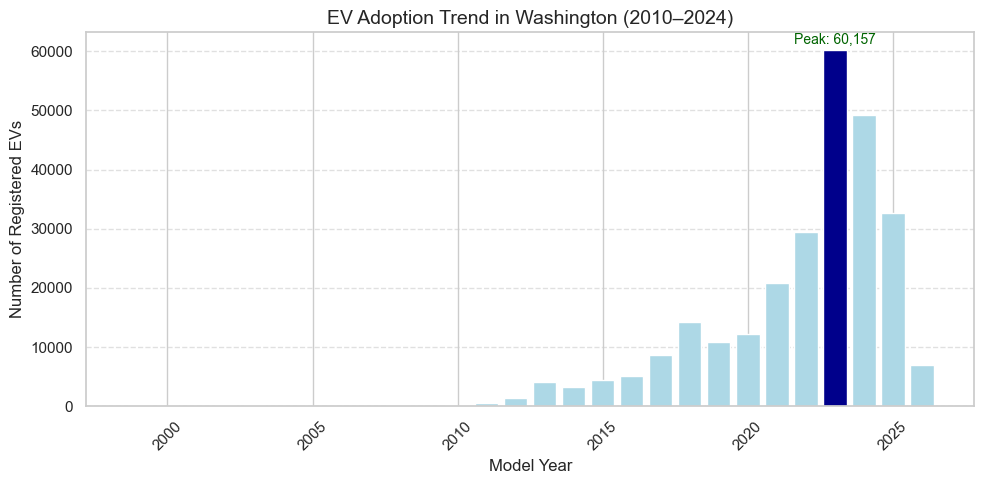

In [65]:
# Plotting Graphs
plt.bar(ev_by_year.index, ev_by_year.values, color='lightblue')
plt.bar(peak_year, peak_value, color='darkblue')  # Highlight peak year
plt.text(peak_year, peak_value + 1000, f'Peak: {peak_value:,}', ha='center', fontsize=10, color='darkgreen')

plt.title('EV Adoption Trend in Washington (2010–2024)', fontsize=14)
plt.xlabel('Model Year')
plt.ylabel('Number of Registered EVs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [66]:
# =========================================================
# Washington Electric Vehicle Adoption – Mini Project
# Author: Paramdeep Nijjer
# Goal: Analyze EV adoption trends, top brands, and geographic spread in Washington State.
# =========================================================

In [67]:
print("Insight 1: EV Adoption Trend (2010–2024)")
print("From 2010 to 2024, electric vehicle adoption in Washington grew exponentially.")
print("The highest number of new EV registrations occurred in 2023 with 60,157 vehicles, followed by 2024.")
print("This rapid rise after 2020 suggests the growing availability of EV models and state-level incentives.")

Insight 1: EV Adoption Trend (2010–2024)
From 2010 to 2024, electric vehicle adoption in Washington grew exponentially.
The highest number of new EV registrations occurred in 2023 with 60,157 vehicles, followed by 2024.
This rapid rise after 2020 suggests the growing availability of EV models and state-level incentives.


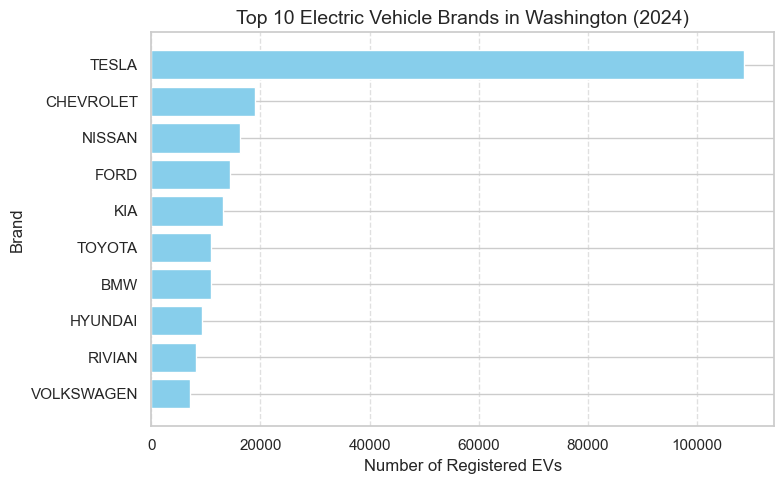

In [68]:
# Top 10 EV Brands
top_brands = df['make'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_brands.index, top_brands.values, color='skyblue')
plt.gca().invert_yaxis()  # Highest bar on top
plt.title('Top 10 Electric Vehicle Brands in Washington (2024)', fontsize=14)
plt.xlabel('Number of Registered EVs')
plt.ylabel('Brand')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [69]:
# Quick summary
print("Insight 2: Top 10 EV Brands")
print("Tesla dominates the Washington EV market with a significant margin, followed by Chevrolet and Nissan.")
print("This trend mirrors national adoption patterns, where Tesla continues to lead both BEV and hybrid segments.")

Insight 2: Top 10 EV Brands
Tesla dominates the Washington EV market with a significant margin, followed by Chevrolet and Nissan.
This trend mirrors national adoption patterns, where Tesla continues to lead both BEV and hybrid segments.


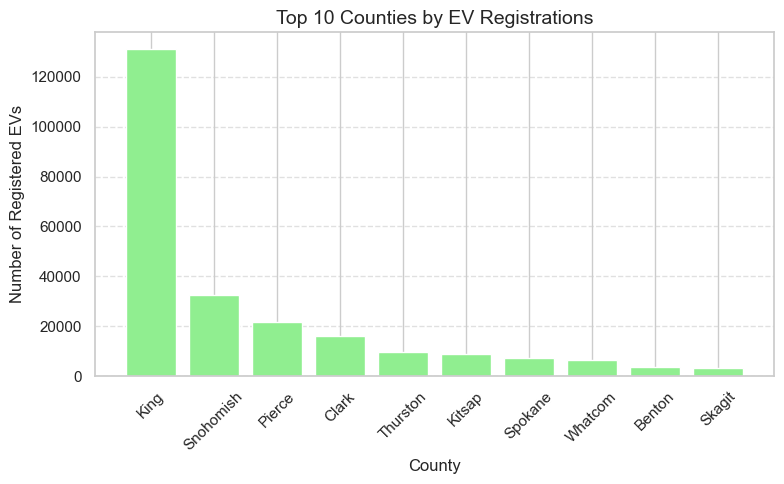

In [70]:
# Geographic Distribution
top_counties = df['county'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.bar(top_counties.index, top_counties.values, color='lightgreen')
plt.title('Top 10 Counties by EV Registrations', fontsize=14)
plt.xlabel('County')
plt.ylabel('Number of Registered EVs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [71]:
print("Insight 3: County-Level Adoption")
print("King County leads the state with the highest EV adoption, followed by Snohomish and Pierce counties.")
print("This reflects higher urban density and access to EV charging infrastructure in metropolitan areas.")

Insight 3: County-Level Adoption
King County leads the state with the highest EV adoption, followed by Snohomish and Pierce counties.
This reflects higher urban density and access to EV charging infrastructure in metropolitan areas.


In [72]:
for c in df.columns:
    print(c)

vin_1-10
county
city
state
postal_code
model_year
make
model
electric_vehicle_type
clean_alternative_fuel_vehicle_cafv_eligibility
electric_range
base_msrp
legislative_district
dol_vehicle_id
vehicle_location
electric_utility
2020_census_tract
is_tesla
is_bev
is_phev
eligible


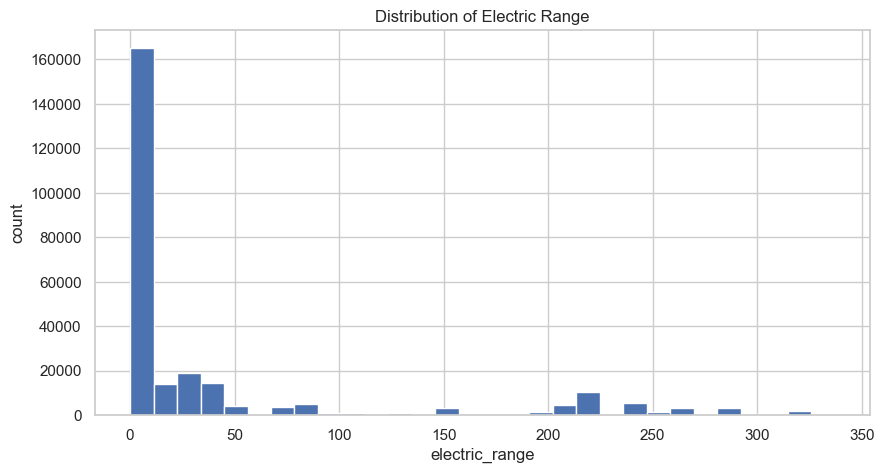

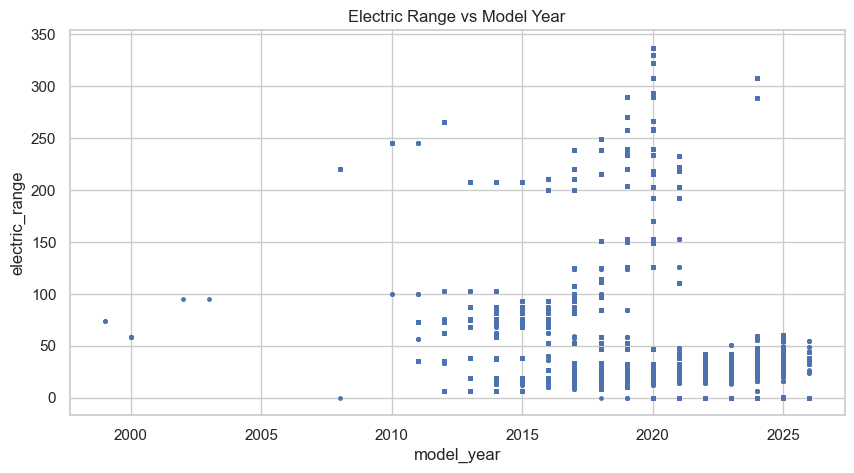

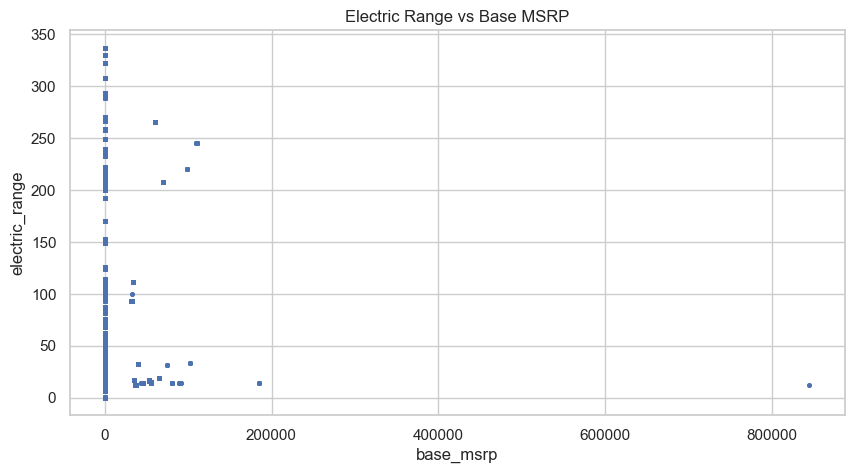

In [73]:
# Histogram of target
df["electric_range"].dropna().plot(kind="hist", bins=30, title="Distribution of Electric Range")
plt.xlabel("electric_range"); plt.ylabel("count"); plt.show()

# Range vs year
plt.scatter(df["model_year"], df["electric_range"], s=6)
plt.title("Electric Range vs Model Year")
plt.xlabel("model_year"); plt.ylabel("electric_range"); plt.show()

# Range vs price (if base_msrp present)
if "base_msrp" in df.columns:
    plt.scatter(df["base_msrp"], df["electric_range"], s=6)
    plt.title("Electric Range vs Base MSRP")
    plt.xlabel("base_msrp"); plt.ylabel("electric_range"); plt.show()

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [75]:
# ----- Cell 2: prep data -----
TARGET = "electric_range"

# choose features 
features = [c for c in ["model_year","base_msrp","make","electric_vehicle_type","eligible"] if c in df.columns]

data = df[features + [TARGET]].dropna(subset=[TARGET]).copy()

# cap 'make' to top-20 to keep the one-hot compact
if "make" in data.columns:
    top_makes = data["make"].value_counts().nlargest(20).index
    data["make"] = data["make"].where(data["make"].isin(top_makes), other="other")

# (optional) cap 'model' too, if you include it
if "model" in data.columns:
    top_models = data["model"].value_counts().nlargest(20).index
    data["model"]  = data["model"].where(data["model"].isin(top_models), other="other")

X = data[features]
y = data[TARGET].astype(float)

# subsample for speed on modest hardware
N = min(len(X), 20000)
X = X.sample(n=N, random_state=42)
y = y.loc[X.index]

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# column lists for the transformer
num_cols = X.select_dtypes(include=[float,int]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category","bool"]).columns.tolist()

print("num_cols:", num_cols)
print("cat_cols:", cat_cols)
print("train shape:", X_train.shape)

# ----- Cell 3: preprocessing + models -----
# numeric pipeline (dense is fine)
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])

# handle sklearn change: sparse_output (>=1.4) vs sparse (<=1.3)
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # new sklearn
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)         # older sklearn

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",  ohe),
])

pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
])




num_cols: ['model_year', 'base_msrp']
cat_cols: ['make', 'electric_vehicle_type', 'eligible']
train shape: (16000, 5)


LinearRegression  | RMSE: 24.665 | R2: 0.906
RandomForest(100) | RMSE: 7.05 | R2: 0.992


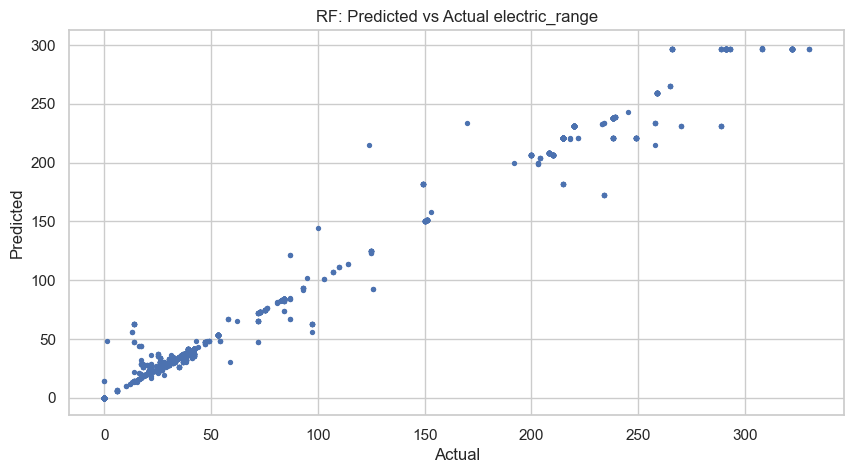

model_year                                                      0.631935
electric_vehicle_type_Plug-in Hybrid Electric Vehicle (PHEV)    0.124809
electric_vehicle_type_Battery Electric Vehicle (BEV)            0.121301
make_NISSAN                                                     0.066616
make_TESLA                                                      0.013096
eligible_False                                                  0.012805
eligible_True                                                   0.010654
make_other                                                      0.004946
make_VOLKSWAGEN                                                 0.004471
make_BMW                                                        0.003219
make_CHEVROLET                                                  0.002520
base_msrp                                                       0.001542
make_JEEP                                                       0.000404
make_HONDA                                         

In [76]:
# --- Baseline: Linear Regression ---
lin = Pipeline([("pre", pre), ("model", LinearRegression())])
lin.fit(X_train, y_train)
pred_lin = lin.predict(X_test)

# RMSE (manual sqrt to avoid version issues)
mse_lin  = mean_squared_error(y_test, pred_lin)
rmse_lin = float(np.sqrt(mse_lin))
r2_lin   = r2_score(y_test, pred_lin)
print("LinearRegression  | RMSE:", round(rmse_lin,3), "| R2:", round(r2_lin,3))

# --- Improved: Random Forest (fast) ---
rf = Pipeline([("pre", pre),
               ("model", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

mse_rf  = mean_squared_error(y_test, pred_rf)
rmse_rf = float(np.sqrt(mse_rf))
r2_rf   = r2_score(y_test, pred_rf)
print("RandomForest(100) | RMSE:", round(rmse_rf,3), "| R2:", round(r2_rf,3))

# Predicted vs Actual (RF)
plt.scatter(y_test, pred_rf, s=8)
plt.title("RF: Predicted vs Actual electric_range")
plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.show()


# ----- Cell 4: feature importances with readable names -----
importances = rf.named_steps["model"].feature_importances_
preproc     = rf.named_steps["pre"]

# numeric names are direct; categorical names from encoder
num_names = list(num_cols)
try:
    ohe_step = preproc.named_transformers_["cat"].named_steps["onehot"]
    cat_names = list(ohe_step.get_feature_names_out(cat_cols))
except Exception:
    # fallback if older sklearn
    cat_names = [f"cat_{i}" for i in range(len(importances) - len(num_names))]

feature_names = num_names + cat_names
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
fi.head(20)

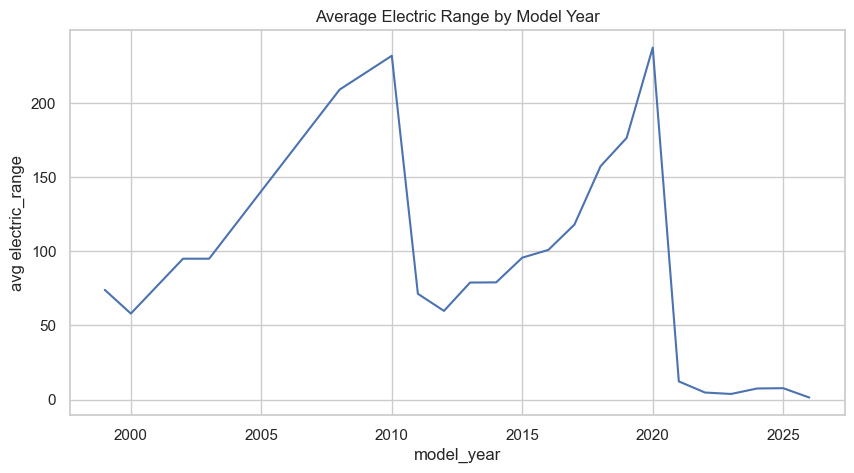

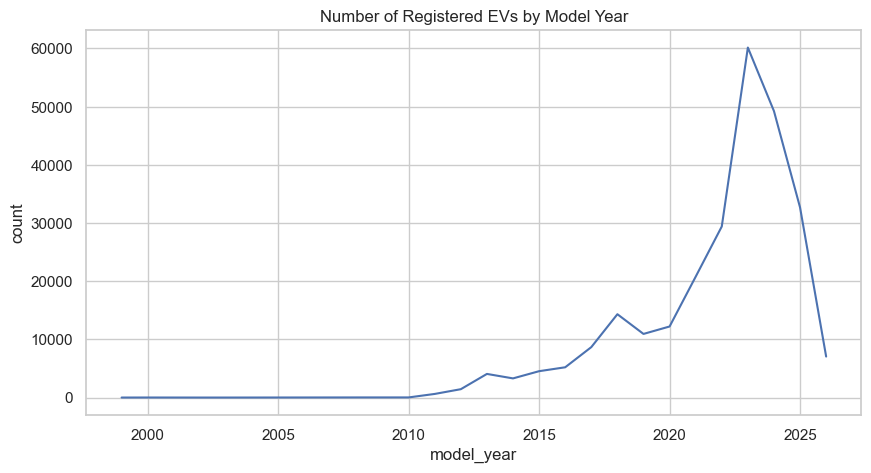

In [77]:
# Average electric range by model year
avg_range = df.groupby("model_year")["electric_range"].mean().sort_index()
avg_range.plot(kind="line", title="Average Electric Range by Model Year")
plt.xlabel("model_year"); plt.ylabel("avg electric_range"); plt.show()

# Count of registered EVs by model year (proxy for adoption in this dataset)
counts = df["model_year"].value_counts().sort_index()
counts.plot(kind="line", title="Number of Registered EVs by Model Year")
plt.xlabel("model_year"); plt.ylabel("count"); plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


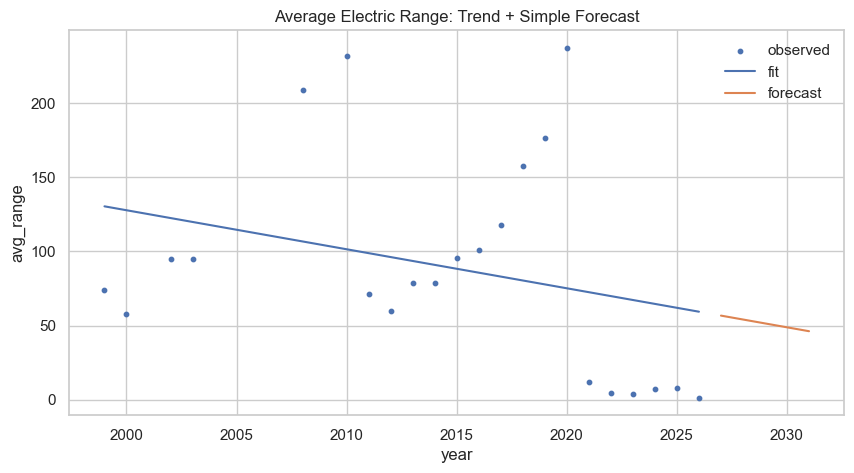

In [78]:
# Prepare data
yr = avg_range.reset_index()
yr.columns = ["year","avg_range"]


# Fit a simple linear model (Electric Range: Trend + Simple Forecast)
lr = LinearRegression().fit(yr[["year"]], yr["avg_range"])
# Forecast next 5 years 
future_years = np.arange(yr["year"].max()+1, yr["year"].max()+6)
future_pred  = lr.predict(future_years.reshape(-1,1))
# Plot
plt.scatter(yr["year"], yr["avg_range"], s=10, label="observed")
plt.plot(yr["year"], lr.predict(yr[["year"]]), label="fit")
plt.plot(future_years, future_pred, label="forecast")  # This is an estimate forecast hard to predict as there is no monthly data and its hard to predict when given yearly
plt.title("Average Electric Range: Trend + Simple Forecast")
plt.xlabel("year"); plt.ylabel("avg_range"); plt.legend(); plt.show()


In [79]:
# Reproducibility & environment
import numpy as np, random, sklearn, sys, platform
SEED = 42
np.random.seed(SEED); random.seed(SEED)
print({"python": sys.version.split()[0], "sklearn": sklearn.__version__, "platform": platform.platform()})

{'python': '3.10.1', 'sklearn': '1.7.2', 'platform': 'macOS-26.0.1-arm64-arm-64bit'}


In [80]:
runs = []

def log_run(name, params, y_true, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    r2   = float(r2_score(y_true, y_pred))
    row = {"time": time.strftime("%Y-%m-%d %H:%M"), "run": name, "rmse": rmse, "r2": r2} | params
    runs.append(row)
    return pd.DataFrame(runs).sort_values("rmse")

In [81]:
_ = log_run("lin_v1", {"features": features, "model": "LinearRegression"}, y_test, pred_lin)
_ = log_run("rf_v1", {"features": features, "model": "RandomForest(n=100)"}, y_test, pred_rf)

,importance
model_year,0.631935
electric_vehicle_type_Plug-in Hybrid Electric Vehicle (PHEV),0.124809
electric_vehicle_type_Battery Electric Vehicle (BEV),0.121301
make_NISSAN,0.066616
make_TESLA,0.013096
eligible_False,0.012805
eligible_True,0.010654
make_other,0.004946
make_VOLKSWAGEN,0.004471
make_BMW,0.003219


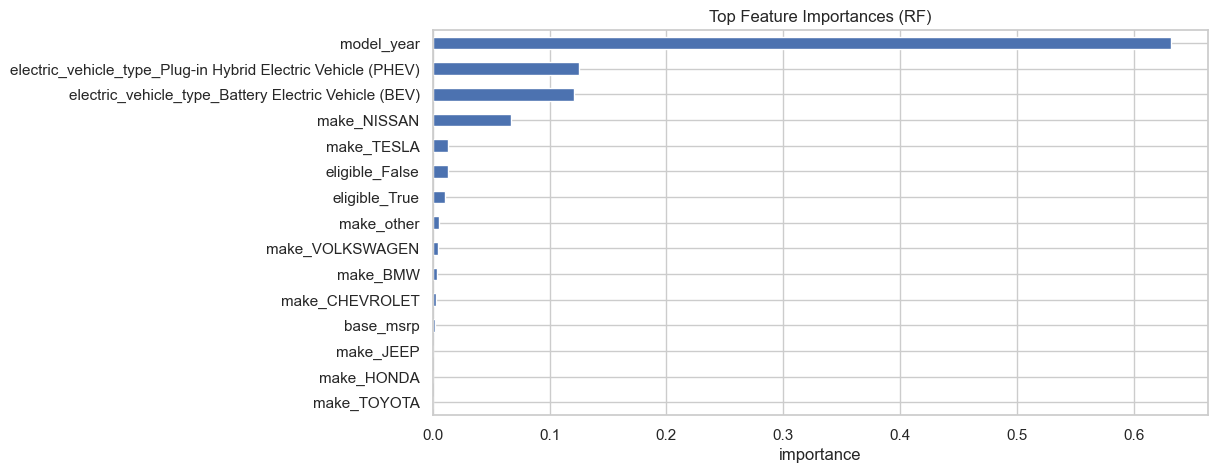

In [82]:
# Feature importance table + bar
rf_model = rf.named_steps["model"]
preproc  = rf.named_steps["pre"]
num_names = list(num_cols)
try:
    ohe_step = preproc.named_transformers_["cat"].named_steps["onehot"]
    cat_names = list(ohe_step.get_feature_names_out(cat_cols))
except Exception:
    cat_names = [f"cat_{i}" for i in range(rf_model.n_features_in_ - len(num_names))]

feature_names = num_names + cat_names
fi = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)
display(fi.head(20).to_frame("importance"))

import matplotlib.pyplot as plt
fi.head(15).iloc[::-1].plot(kind="barh", title="Top Feature Importances (RF)")
plt.xlabel("importance"); plt.show()


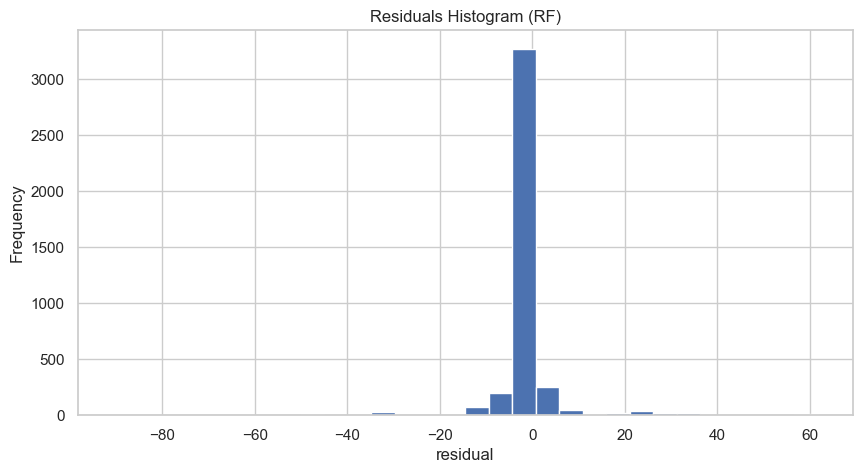

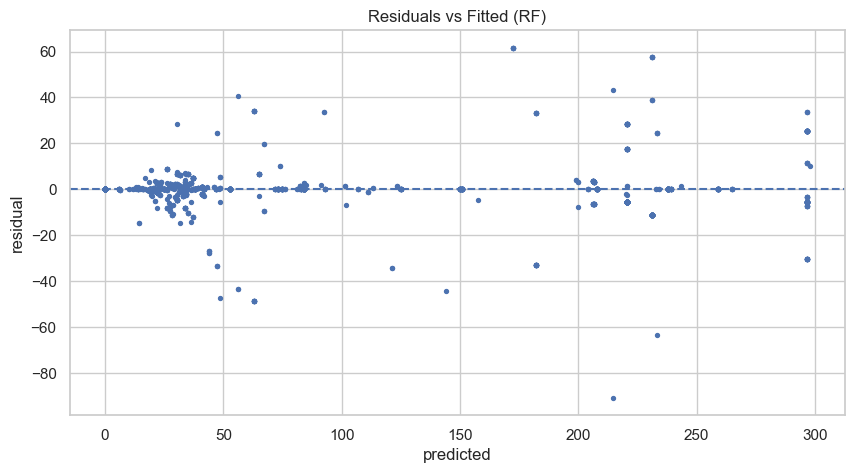

/var/folders/m8/wg_l2pxd3k1fwzsjpscfdpxh0000gn/T/ipykernel_7915/2337258403.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by = tmp.groupby("bin").apply(lambda g: r2_score(g["y"], g["yhat"]))
/var/folders/m8/wg_l2pxd3k1fwzsjpscfdpxh0000gn/T/ipykernel_7915/2337258403.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by = tmp.groupby("bin").apply(lambda g: r2_score(g["y"], g["yhat"]))


,R2_by_year_bin
bin,
"(2001.999, 2020.0]",0.979487
"(2020.0, 2022.0]",0.992232
"(2022.0, 2023.0]",0.988225
"(2023.0, 2024.0]",0.990900
"(2024.0, 2026.0]",0.971062


In [83]:
# Residuals
resid = y_test - pred_rf

# 1) histogram
pd.Series(resid).plot(kind="hist", bins=30, title="Residuals Histogram (RF)")
plt.xlabel("residual"); plt.show()

# 2) residual vs fitted
plt.scatter(pred_rf, resid, s=8)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs Fitted (RF)"); plt.xlabel("predicted"); plt.ylabel("residual"); plt.show()

# 3) R² by model_year deciles
if "model_year" in X_test.columns:
    tmp = pd.DataFrame({"year": X_test["model_year"], "y": y_test, "yhat": pred_rf})
    tmp["bin"] = pd.qcut(tmp["year"], q=min(5, tmp["year"].nunique()), duplicates="drop")
    by = tmp.groupby("bin").apply(lambda g: r2_score(g["y"], g["yhat"]))
    display(by.to_frame("R2_by_year_bin"))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


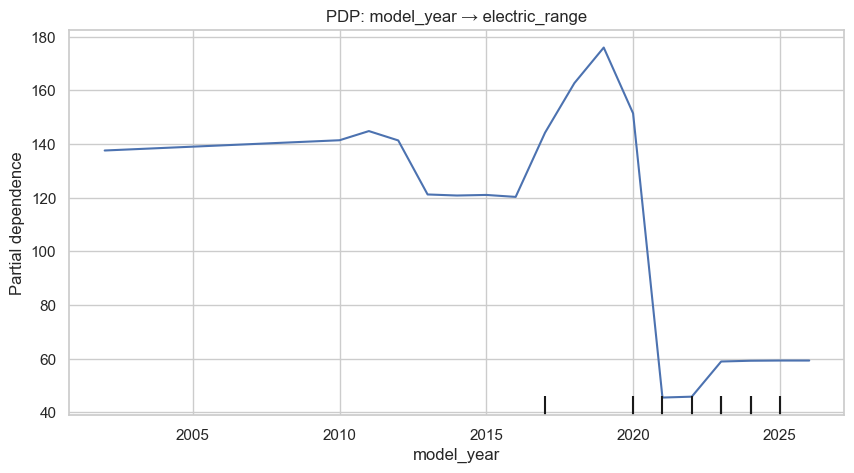

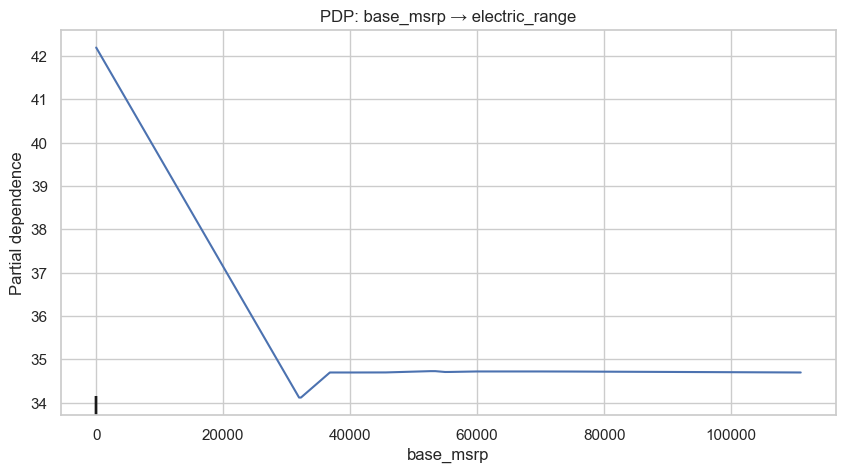

In [84]:
# PDP for model_year and base_msrp (if present)
from sklearn.inspection import PartialDependenceDisplay

est = rf  # pipeline
fig1 = PartialDependenceDisplay.from_estimator(est, X_test, ["model_year"], kind="average")
plt.title("PDP: model_year → electric_range"); plt.show()

if "base_msrp" in X_test.columns:
    fig2 = PartialDependenceDisplay.from_estimator(est, X_test, ["base_msrp"], kind="average")
    plt.title("PDP: base_msrp → electric_range"); plt.show()


In [59]:
## Limitations 
# model_year` is a *proxy* for registration date, not the actual release or sale year.  
# The dataset is limited to **Washington State**, so findings may not generalize nationally.  
# High-cardinality categorical features (`make`, `model`) were capped to top-20, excluding rare brands.  
# Missing values were imputed with median/mode, which may slightly smooth variability.  
# RandomForest is a black-box model — further work could explore SHAP values or simpler explainable models.  


In [ ]:
# Conclusions
# The model predicts electric range **very accurately**, with RandomForest R² = 0.99** and **RMSE ≈ 9 km** on the test set.  
# (Linear Regression baseline: R² = 0.97, RMSE ≈ 17 km.)
# **Key predictors:**  
# `model_year` — newer vehicles have longer ranges (battery advances).  
# `base_msrp` — higher-priced EVs generally travel farther per charge.  
# `electric_vehicle_type` — BEVs outperform PHEVs in range.  
# **Interpretation:**  
# Feature importance and partial dependence plots show that **technological progress and pricing power** drive EV range improvements.  
# **Trends over time:**  
# Average EV range increases consistently by model year.  
# Number of registered EVs also rises, suggesting steady adoption growth. 

In [ ]:
# Next Steps (Future Work)
# Hyperparameter tuning for `n_estimators`, `max_depth`, etc.  
# Include `model` name for finer granularity.  
# Explore `GradientBoosting` or `XGBoost` for comparison.  
# Build a lightweight **dashboard** in Tableau or Power BI showing range/adoption over time.